In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')

from matplotlib.lines import Line2D

import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_stellarhalo
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg

In [3]:
plt.style.use('../../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [4]:
S0 = jsm_ancillary.load_sample("../../data/fiducial/S0HR_sample.h5")
# S15 = jsm_ancillary.load_sample("../../data/fiducial/S15_sample.h5")
# S30 = jsm_ancillary.load_sample("../../data/fiducial/S30_sample.h5")

# orders

In [23]:
S0_acc_order = jsm_ancillary.make_matrix(S0, "sat_acc_order")
S0_order = jsm_ancillary.make_matrix(S0, "sat_order")


S0_zacc = jsm_ancillary.make_matrix(S0, "sat_zacc")
# S0_zacc_p = jsm_ancillary.make_matrix(S0, "sat_zacc_proper")

# S0_zacc_proper = np.empty(shape=S0_zacc_p.shape)
# for i,arr in enumerate(S0_zacc_p):
#     S0_zacc_proper[i] = cfg.zsample[arr.astype('int')]

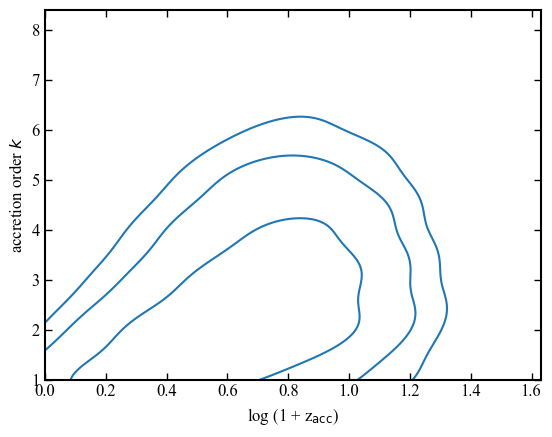

In [24]:
# sns.kdeplot(x=np.log10(1+S0_zacc.ravel()[0:10000]), y=S0_acc_order.ravel()[0:10000], bw_adjust=2, levels=levelz)
sns.kdeplot(x=np.log10(1+S0_zacc.ravel()[0:10000]), y=S0_acc_order.ravel()[0:10000], bw_adjust=2, levels=levelz)

plt.ylim(1)
plt.xlim(0)
plt.xlabel("log (1 + z$_{\\rm acc}$)")
plt.ylabel("accretion order $k$")

plt.show()

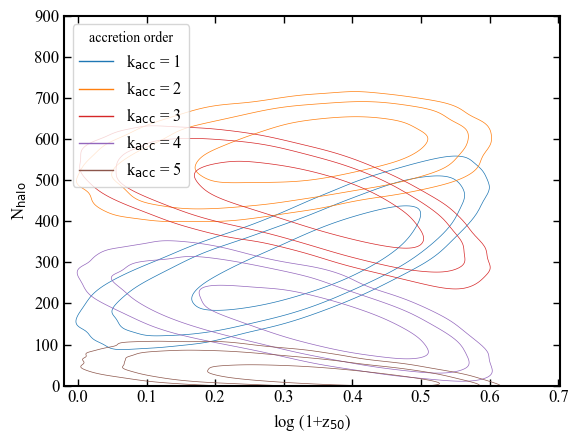

In [25]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_acc_order == 1, axis=1),
            levels=levelz, color="C0", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_acc_order == 2, axis=1),
            levels=levelz, color="C1", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_acc_order == 3, axis=1),
            levels=levelz, color="C3", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_acc_order == 4, axis=1),
            levels=levelz, color="C4", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_acc_order == 5, axis=1),
            levels=levelz, color="C5", linewidths=0.5, bw_adjust=1.5)

# --- custom legend handles ---
custom_lines = [
    Line2D([0], [0], color="C0", lw=1, label="k$_{\\rm acc}$ = 1"),
    Line2D([0], [0], color="C1", lw=1, label="k$_{\\rm acc}$ = 2"),
    Line2D([0], [0], color="C3", lw=1, label="k$_{\\rm acc}$ = 3"),
    Line2D([0], [0], color="C4", lw=1, label="k$_{\\rm acc}$ = 4"),
    Line2D([0], [0], color="C5", lw=1, label="k$_{\\rm acc}$ = 5"),
]

ax.legend(handles=custom_lines, title="accretion order",
          frameon=True, loc="upper left")

ax.set_xlabel("log (1+z$_{50}$)")
ax.set_ylabel("N$_{\\rm halo}$")
ax.set_ylim(0, 900)
ax.set_xlim(-0.02)

plt.show()


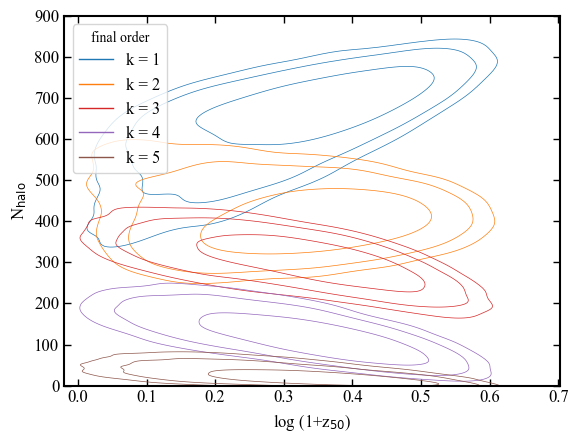

In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_order == 1, axis=1),
            levels=levelz, color="C0", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_order == 2, axis=1),
            levels=levelz, color="C1", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_order == 3, axis=1),
            levels=levelz, color="C3", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_order == 4, axis=1),
            levels=levelz, color="C4", linewidths=0.5, bw_adjust=1.5)
sns.kdeplot(x=np.log10(1+S0.host_z50), y=np.sum(S0_order == 5, axis=1),
            levels=levelz, color="C5", linewidths=0.5, bw_adjust=1.5)

# --- custom legend handles ---
custom_lines = [
    Line2D([0], [0], color="C0", lw=1, label="k = 1"),
    Line2D([0], [0], color="C1", lw=1, label="k = 2"),
    Line2D([0], [0], color="C3", lw=1, label="k = 3"),
    Line2D([0], [0], color="C4", lw=1, label="k = 4"),
    Line2D([0], [0], color="C5", lw=1, label="k = 5"),
]

ax.legend(handles=custom_lines, title="final order",
          frameon=True, loc="upper left")

ax.set_xlabel("log (1+z$_{50}$)")
ax.set_ylabel("N$_{\\rm halo}$")
ax.set_ylim(0, 900)
ax.set_xlim(-0.02)

plt.show()


In [27]:
S0_acc_order = jsm_ancillary.make_matrix(S0, "sat_acc_order")
S0_masses = np.log10(jsm_ancillary.make_matrix(S0, "sat_mass"))

order_mask = S0_acc_order == 1
fb_mask = S0_masses > 8

S0_masses = np.where(fb_mask, S0_masses, np.nan)
Nsat = np.sum(~np.isnan(S0_masses), axis=1)

S0_masses = np.where(order_mask, S0_masses, np.nan)
Nsat_ordermask = np.sum(~np.isnan(S0_masses), axis=1)

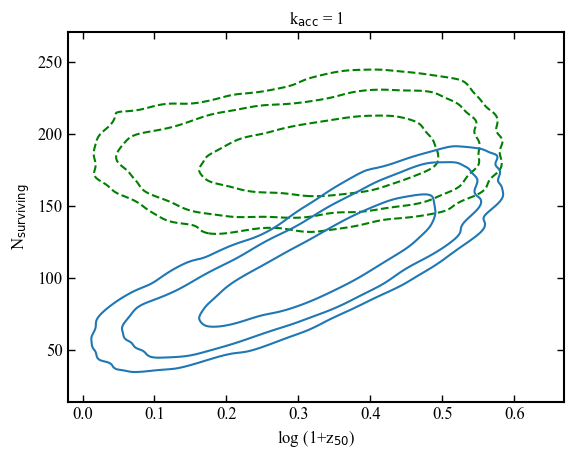

In [29]:
plt.title("k$_{\\rm acc}$ = 1")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat, levels=levelz, color="green", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat_ordermask, levels=levelz, color="C0")

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")
plt.xlim(-0.02)


plt.show()

In [30]:
S0_acc_order = jsm_ancillary.make_matrix(S0, "sat_acc_order")
S0_masses = np.log10(jsm_ancillary.make_matrix(S0, "sat_mass"))

order_mask = S0_acc_order == 2
fb_mask = S0_masses > 8

S0_masses = np.where(fb_mask, S0_masses, np.nan)
Nsat = np.sum(~np.isnan(S0_masses), axis=1)

S0_masses = np.where(order_mask, S0_masses, np.nan)
Nsat_ordermask = np.sum(~np.isnan(S0_masses), axis=1)

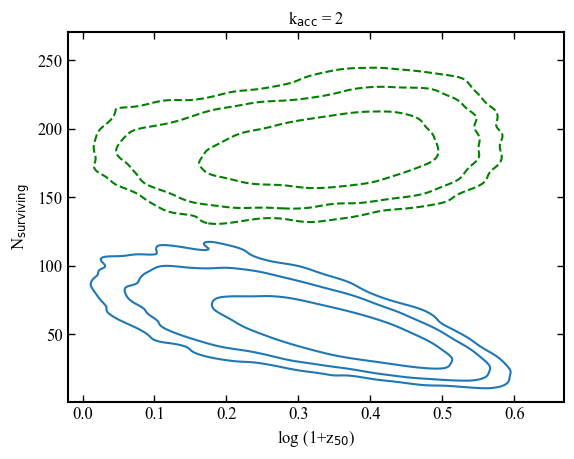

In [31]:
plt.title("k$_{\\rm acc}$ = 2")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat, levels=levelz, color="green", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat_ordermask, levels=levelz, color="C0")

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")
# plt.ylim(80)
plt.xlim(-0.02)

# plt.text(0.02, 5, "later forming")
# plt.text(0.5, 5, "earlier forming")

plt.show()

In [32]:
S0_acc_order = jsm_ancillary.make_matrix(S0, "sat_order")
S0_masses = np.log10(jsm_ancillary.make_matrix(S0, "sat_mass"))

order_mask = S0_acc_order == 1
fb_mask = S0_masses > 8

S0_masses = np.where(fb_mask, S0_masses, np.nan)
Nsat = np.sum(~np.isnan(S0_masses), axis=1)

S0_masses = np.where(order_mask, S0_masses, np.nan)
Nsat_ordermask = np.sum(~np.isnan(S0_masses), axis=1)

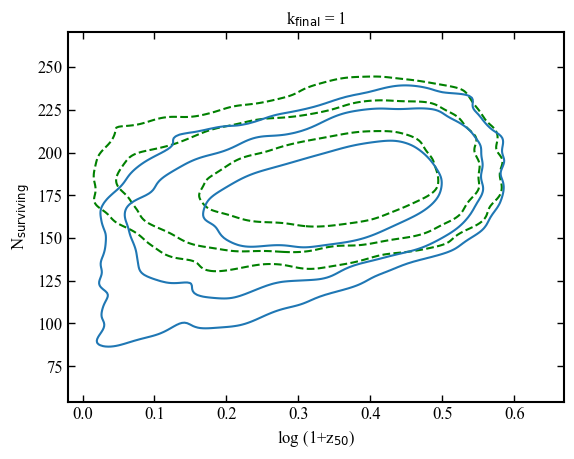

In [33]:
plt.title("k$_{\\rm final}$ = 1")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat, levels=levelz, color="green", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat_ordermask, levels=levelz, color="C0")

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")
# plt.ylim(80)
plt.xlim(-0.02)

# plt.text(0.02, 5, "later forming")
# plt.text(0.5, 5, "earlier forming")

plt.show()

In [34]:
S0_acc_order = jsm_ancillary.make_matrix(S0, "sat_order")
S0_masses = np.log10(jsm_ancillary.make_matrix(S0, "sat_mass"))

order_mask = S0_acc_order == 2
fb_mask = S0_masses > 8

S0_masses = np.where(fb_mask, S0_masses, np.nan)
Nsat = np.sum(~np.isnan(S0_masses), axis=1)

S0_masses = np.where(order_mask, S0_masses, np.nan)
Nsat_ordermask = np.sum(~np.isnan(S0_masses), axis=1)

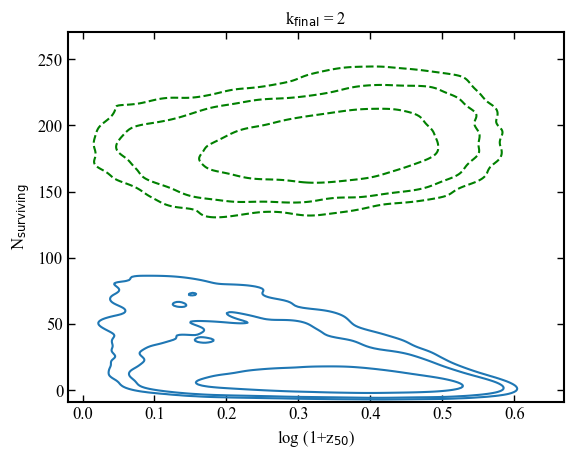

In [35]:
plt.title("k$_{\\rm final}$ = 2")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat, levels=levelz, color="green", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat_ordermask, levels=levelz, color="C0")

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")
# plt.ylim(80)
plt.xlim(-0.02)

# plt.text(0.02, 5, "later forming")
# plt.text(0.5, 5, "earlier forming")

plt.show()

## what about outside the virial radius?

In [36]:
S0_rmag = jsm_ancillary.make_matrix(S0, "sat_final_rmag")
S0_masses = np.log10(jsm_ancillary.make_matrix(S0, "sat_mass"))

vir_mask = S0_rmag < S0.host_Rvir[0]
fb_mask = S0_masses > 8

S0_masses = np.where(fb_mask, S0_masses, np.nan)
Nsat = np.sum(~np.isnan(S0_masses), axis=1)

S0_masses = np.where(vir_mask, S0_masses, np.nan)
Nsat_Rvir = np.sum(~np.isnan(S0_masses), axis=1)

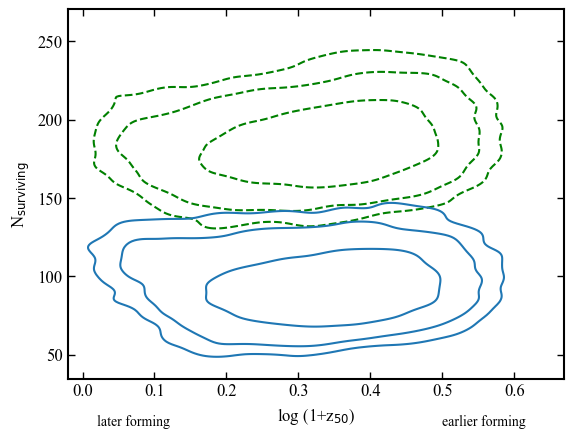

In [18]:
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat, levels=levelz, color="green", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsat_Rvir, levels=levelz, color="C0")

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")
# plt.ylim(80)
plt.xlim(-0.02)

plt.text(0.02, 5, "later forming")
plt.text(0.5, 5, "earlier forming")

plt.show()

# accretion times

In [37]:
S0_masses = np.log10(jsm_ancillary.make_matrix(S0, "sat_mass")/jsm_ancillary.make_matrix(S0, "sat_acc_mass"))
        
# S15_masses = np.log10(jsm_ancillary.make_matrix(S15, "sat_mass")/jsm_ancillary.make_matrix(S15, "sat_acc_mass"))

# S30_masses = np.log10(jsm_ancillary.make_matrix(S30, "sat_mass")/jsm_ancillary.make_matrix(S30, "sat_acc_mass"))

mask = S0_masses != -4
S0_masses = np.where(mask, S0_masses, np.nan)

In [38]:
S0_zacc = np.log10(1+jsm_ancillary.make_matrix(S0, "sat_zacc"))

# S15_zacc = np.log10(1+jsm_ancillary.make_matrix(S15, "sat_zacc"))

# S30_zacc = np.log10(1+jsm_ancillary.make_matrix(S30, "sat_zacc"))

In [39]:
# Example: flatten 2D arrays to 1D
x = S0_zacc.ravel()
y = S0_masses.ravel()

x = x[y != -4]
y = y[y != -4]

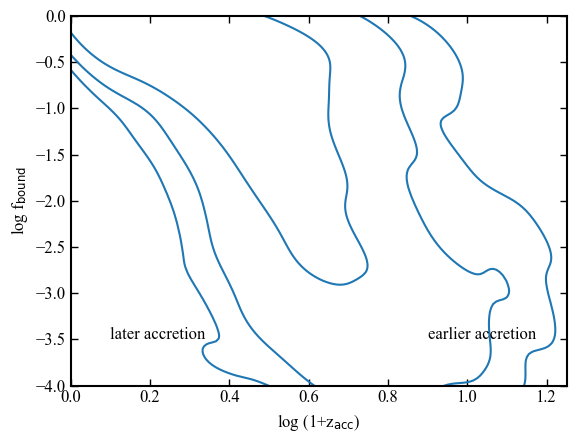

In [40]:
sns.kdeplot(x=x[0:10000], y=y[0:10000], levels=levelz)
plt.xlabel("log (1+z$_{\\rm acc}$)")
plt.ylabel("log f$_{\\rm bound}$")
plt.ylim(-4, 0)
plt.xlim(0, 1.25)


plt.text(0.1, -3.5, "later accretion", fontsize=12)
plt.text(0.9, -3.5, "earlier accretion", fontsize=12)

plt.show()

In [41]:
med_zacc = np.log10(np.nanmedian(10**S0_zacc - 1, axis=1) + 1)

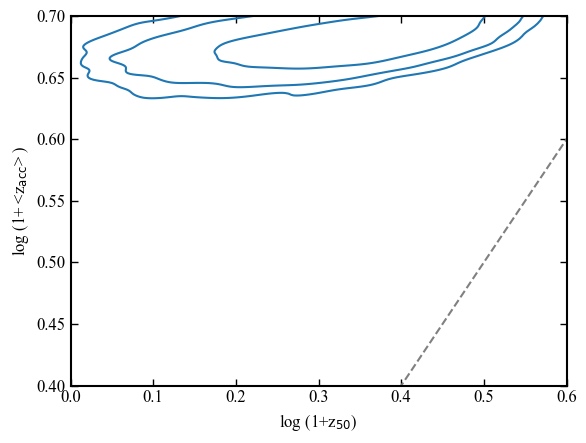

In [42]:
sns.kdeplot(x=np.log10(1+S0.host_z50), y=med_zacc, levels=levelz)
plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("log (1+ <z$_{\\rm acc}$> )")

plt.plot(np.linspace(0,1),np.linspace(0,1), ls="--", color="grey")
plt.ylim(0.4, 0.7)
plt.xlim(0, 0.6)

plt.show()

# Mass cuts

In [ ]:
S0_fates = jsm_ancillary.make_matrix(S0, 'sat_fates')

S15_fates = jsm_ancillary.make_matrix(S15, 'sat_fates')

S30_fates = jsm_ancillary.make_matrix(S30, 'sat_fates')

In [ ]:
S0_masses =jsm_ancillary.make_matrix(S0, "sat_mass")

S15_masses =jsm_ancillary.make_matrix(S15, "sat_mass")

S30_masses =jsm_ancillary.make_matrix(S30, "sat_mass")

S0_masses = np.where(S0_fates == 1, S0_masses, np.nan)

S15_masses = np.where(S15_fates == 1, S15_masses, np.nan)

S30_masses = np.where(S30_fates == 1, S30_masses, np.nan)

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

lim = 1e5

yS30 = np.sum(S30_masses > lim, axis=1)
yS15 =np.sum(S15_masses > lim, axis=1)
yS0 = np.sum(S0_masses > lim, axis=1)

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  yS0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), yS15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), yS30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=yS30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=yS15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=yS0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^5$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,150)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

lim = 1e6

yS30 = np.sum(S30_masses > lim, axis=1)
yS15 =np.sum(S15_masses > lim, axis=1)
yS0 = np.sum(S0_masses > lim, axis=1)

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  yS0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), yS15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), yS30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=yS30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=yS15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=yS0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^6$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,150)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

lim = 1e7

yS30 = np.sum(S30_masses > lim, axis=1)
yS15 =np.sum(S15_masses > lim, axis=1)
yS0 = np.sum(S0_masses > lim, axis=1)

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  yS0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), yS15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), yS30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=yS30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=yS15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=yS0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^7$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,150)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

lim = 1e8

yS30 = np.sum(S30_masses > lim, axis=1)
yS15 =np.sum(S15_masses > lim, axis=1)
yS0 = np.sum(S0_masses > lim, axis=1)

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  yS0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), yS15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), yS30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=yS30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=yS15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=yS0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^8$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,150)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

lim = 1e9

yS30 = np.sum(S30_masses > lim, axis=1)
yS15 =np.sum(S15_masses > lim, axis=1)
yS0 = np.sum(S0_masses > lim, axis=1)

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  yS0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), yS15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), yS30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=yS30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=yS15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=yS0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^9$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,150)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

lim = 1e10

yS30 = np.sum(S30_masses > lim, axis=1)
yS15 =np.sum(S15_masses > lim, axis=1)
yS0 = np.sum(S0_masses > lim, axis=1)

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  yS0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), yS15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), yS30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=yS30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=yS15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=yS0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^{10}$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,150)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

lim = 1e10

yS30 = np.sum(S30_masses > lim, axis=1)
yS15 =np.sum(S15_masses > lim, axis=1)
yS0 = np.sum(S0_masses > lim, axis=1)

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  yS0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), yS15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), yS30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=yS30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=yS15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=yS0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^{10}$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,15)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)

plt.show()

# artificial disruption model

In [ ]:
def mdis(m_acc, c_acc,
                 A=3.08, B=-3.26, C=-8.89,
                 D=0.38, E=-0.51, F=0.40,
                 size=None, return_scale=False):
    """
    Compute the critical disruption mass m_dis following Taylor & Babul (2004),
    with f_dis(m_acc) drawn from a lognormal distribution using SciPy.

    Parameters
    ----------
    m_acc : float or ndarray
        Subhalo mass at accretion.
    c_acc : float or ndarray
        Concentration at accretion (r_vir / r_s).
    A, B, C, D, E, F : float
        Best-fit parameters defining mu and sigma of the lognormal.
    size : int or tuple, optional
        Number of random draws for f_dis (default: same shape as m_acc).

    Returns
    -------
    m_dis : float or ndarray
        Critical disruption mass below which the subhalo is considered disrupted.
    f_dis_draw : float or ndarray
        Randomly drawn value(s) of f_dis.
    mu : float or ndarray
        Mean of the lognormal distribution.
    sigma : float or ndarray
        Standard deviation of the lognormal distribution.
    """

    # Helper for NFW mass fraction
    def f(x):
        return np.log(1 + x) - x / (1 + x)

    # Compute mu and sigma
    log_m = np.log10(m_acc)
    if log_m < 10.0:
        mu=0.6579463705605844
        sigma=0.21760472162764027
    else:
        mu = A + B * (1 + (log_m + C)**(-2))**(-0.5)
        sigma = D + E * mu + F * mu**2

    # Draw f_dis from lognormal using SciPy
    f_dis_draw = np.random.lognormal(mu, sigma, size)

    scale = f(f_dis_draw) / f(c_acc)

    # Compute m_dis
    m_dis = m_acc * scale

    return m_dis


In [ ]:
S0_c =jsm_ancillary.make_matrix(S0, "sat_acc_c")[:, 1:]

S15_c =jsm_ancillary.make_matrix(S15, "sat_acc_c")[:, 1:]

S30_c =jsm_ancillary.make_matrix(S30, "sat_acc_c")[:, 1:]

S0_c = np.where(S0_fates == 1, S0_c, np.nan)

S15_c = np.where(S15_fates == 1, S15_c, np.nan)

S30_c = np.where(S30_fates == 1, S30_c, np.nan)

In [ ]:
S0_acc =jsm_ancillary.make_matrix(S0, "sat_acc_mass")

S15_acc =jsm_ancillary.make_matrix(S15, "sat_acc_mass")

S30_acc =jsm_ancillary.make_matrix(S30, "sat_acc_mass")

S0_acc = np.where(S0_fates == 1, S0_acc, np.nan)

S15_acc = np.where(S15_fates == 1, S15_acc, np.nan)

S30_acc = np.where(S30_fates == 1, S30_acc, np.nan)

In [ ]:
S0_dis = np.full(shape=S0_acc.shape, fill_value=np.nan)

S15_dis = np.full(shape=S15_acc.shape, fill_value=np.nan)

S30_dis = np.full(shape=S30_acc.shape, fill_value=np.nan)

In [ ]:
S0_hostc =jsm_ancillary.make_matrix(S0, "sat_acc_c")[:, 0]

In [ ]:
test = []
for i in range(10000):
    S0_c_ii = S0_c[i][~np.isnan(S0_c[i])]
    N_tot = S0_c_ii.shape[0]
    N_more_concentrated = np.sum(S0_c[i] > 7)
    test.append(N_more_concentrated/N_tot)

test = np.array(test)

In [ ]:
sns.kdeplot(x=np.log10(1+S0.host_z50), y=test, levels=levelz)
plt.ylabel("fraction of subhalos with \n c$_{\\rm acc}$ > 10")
plt.ylim(0,1)
plt.xlabel("log (1+z$_{50}$)")
plt.show()

In [ ]:
sns.kdeplot(x=np.log10(1+S0.host_z50), y=S0_hostc, levels=levelz)
plt.ylabel("c$_{\\rm host}$ (z=0)")
plt.xlabel("log (1+z$_{50}$)")
plt.ylim(0,30)
plt.show()

In [ ]:
S0_hostc

In [ ]:
S0_c

In [ ]:
for i in range(10000):
    S0_dis[i] = np.array([mdis(S0_acc[i,j], S0_c[i,j]) for j in range(len(S0_acc[i]))])
    S15_dis[i] = np.array([mdis(S15_acc[i,j], S15_c[i,j]) for j in range(len(S15_acc[i]))])
    S30_dis[i] = np.array([mdis(S30_acc[i,j], S30_c[i,j]) for j in range(len(S30_acc[i]))])

In [ ]:
Nsub_S0 = np.sum(~np.isnan(S0_masses), axis=1) - np.sum(S0_dis > S0_masses, axis=1)
Nsub_S15 = np.sum(~np.isnan(S15_masses), axis=1) - np.sum(S15_dis > S15_masses, axis=1)
Nsub_S30 = np.sum(~np.isnan(S30_masses), axis=1) - np.sum(S30_dis > S30_masses, axis=1)

In [ ]:
plt.figure(figsize=(double_textwidth, double_textwidth))

r0  = jsm_stats.correlation(np.log10(1 + S0.host_z50),  Nsub_S0)
r15 = jsm_stats.correlation(np.log10(1 + S15.host_z50), Nsub_S15)
r30 = jsm_stats.correlation(np.log10(1 + S30.host_z50), Nsub_S30)

sns.kdeplot(x=np.log10(1+S30.host_z50), y=Nsub_S30, levels=levelz, color="red", linestyles=":")
sns.kdeplot(x=np.log10(1+S15.host_z50), y=Nsub_S15, levels=levelz, color="darkorange", linestyles="--")
sns.kdeplot(x=np.log10(1+S0.host_z50), y=Nsub_S0, levels=levelz, color="green")

legend_element = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=1, label='S$_0$ ($\\rho_{S}$ ='+f' {r0:.2f})'),
    Line2D([0], [0], color='darkorange', linestyle='--', linewidth=1, label='S$_{15}$ ($\\rho_{S}$ ='+f' {r15:.2f})'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=1, label='S$_{30}$ ($\\rho_{S}$ ='+f' {r30:.2f})')]

plt.legend(handles=legend_element, framealpha=1, loc=1)

plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N (> 10$^5$ M$_{\\odot}$)")
plt.xlim(-0.02)
plt.ylim(0,150)
plt.text(0.02, 0.7, "later forming", fontsize=15)
plt.text(0.5, 0.7, "earlier forming", fontsize=15)
plt.show()